# Import required libraries

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Import Dataset

In [4]:
df = pd.read_excel("task2_sparks.xlsx")

In [5]:
df.head(10)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,8.5
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,48.820000
std,2.525094,26.191156
min,1.100000,8.500000
25%,2.700000,27.000000
50%,4.800000,42.000000
75%,7.400000,69.000000
max,9.200000,95.000000


# Histogram Plot

D:\Dhrumil\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


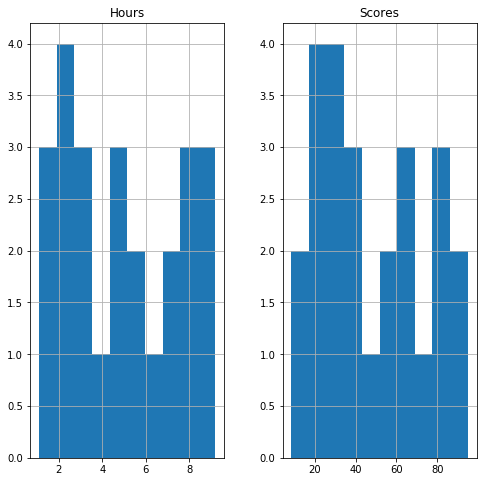

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# Hours vs Percentage Graph

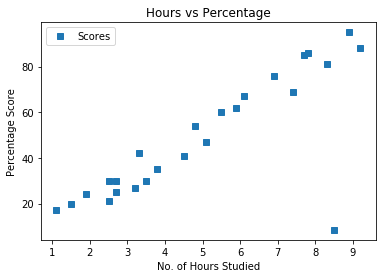

In [29]:
df.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

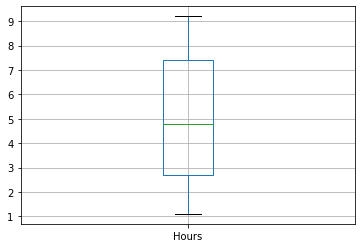

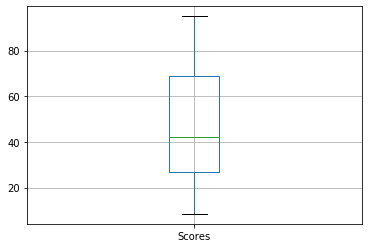

In [30]:
for column in df:
    plt.figure()
    df.boxplot([column])

### From all three figures,it seems that average percentage score increases with the increament in number of hours.

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

# Linear Regression 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
regressor.score(X_test,y_test)

0.736929810906763

# RandomForestRegression

In [37]:
from sklearn.ensemble import RandomForestRegressor 
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor1.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [38]:
y_pred1 = regressor1.predict(X_test)

In [39]:
regressor1.score(X_test,y_test)

0.9753468613138686

### It can be seen the random forest regression have better score then the Linear regression algorithm,so predictions from the random forest regression will be more accurate.

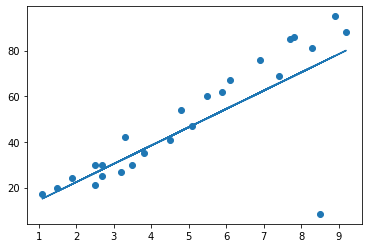

In [40]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

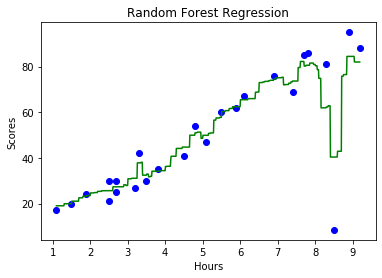

In [41]:
X_grid = np.arange(min(X), max(X), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(X, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor1.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Hours') 
plt.ylabel('Scores') 
plt.show()

## from the two graphs, Random Forest Regression has better prediction accuracy the the Linear regression.

# Comparison of actual and predicted scores

In [42]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})  
df2 

,Actual,Predicted
0,47.0,49.900
1,67.0,65.480
2,42.0,37.845
3,20.0,19.945
4,60.0,57.760
5,69.0,73.655
6,76.0,74.530
7,62.0,62.400


# Prediction

In [43]:
hours = 9.25
own_pred = regressor1.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 81.99
